# Finance with Python

## import libraries

In [0]:
import pandas as pd                 #For data manipulation 
from pandas_datareader import data  #For stock data
import matplotlib.pyplot as plt     #For plotting data
import numpy as np        #For numerical computation
import seaborn as sns
%matplotlib inline          

## Download all data

In [0]:
def stock_data(start,end,loc): 

    date_index = pd.date_range(start,end) #Create an index of dates
        
    df1=pd.DataFrame(index=date_index)    #Create empty dataframe 
    
    for sym in loc:                      #Append Different Company Close Price
        df=data.DataReader(sym,'yahoo',start,end) #Get data from yahoo finance
        df1=df1.join(df['Close'])
        df1.rename(columns={'Close':f'{sym}'},inplace=True)
    return df1.dropna()                  #Remove holiday nan values

In [0]:
ticker = ['GOOGL','CSCO','MSFT','AAPL']  #Tickers for different companies
alloc=[0.4,0.4,0.1,0.1]                  #Declare portfolio allocation perecnt
    
start='2010-01-25'                      #Set start and end date
end='2010-12-25'  
    
a = stock_data(start,end,ticker)

# View data

In [0]:
a.head(10) #First 10 values

,GOOGL,CSCO,MSFT,AAPL
2010-01-25,270.270264,22.990000,29.320000,29.010000
2010-01-26,271.481476,22.900000,29.500000,29.420000
2010-01-27,271.321320,23.150000,29.670000,29.697144
2010-01-28,267.412415,22.520000,29.160000,28.469999
2010-01-29,265.235229,22.469999,28.180000,27.437143
2010-02-01,266.776764,22.730000,28.410000,27.818571
2010-02-02,265.825836,23.020000,28.459999,27.980000
2010-02-03,270.680695,23.070000,28.629999,28.461428
2010-02-04,263.653656,23.160000,27.840000,27.435715
2010-02-05,265.910919,23.700001,28.020000,27.922857


## View raw data

Text(0.5, 1.0, 'Stock Price ')

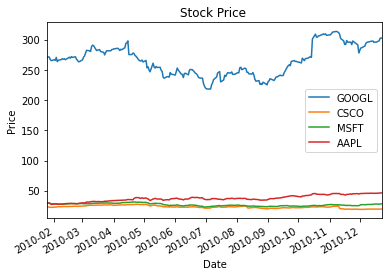

In [0]:
ax=a.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title(f"Stock Price ")

## View Normalized better graph

Text(0.5, 1.0, 'Stock Price ')

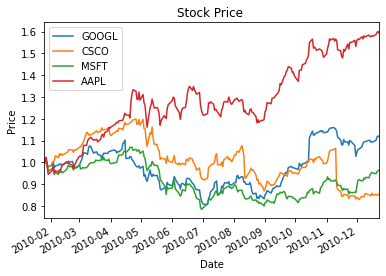

In [0]:
ax=(a/a.iloc[0]).plot()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title(f"Stock Price ")

## Calculate Rolling Mean

In [0]:
#Calculate with a rolling window of 20
def rollingMean(df):
    
    return df.rolling(20).mean()

In [0]:
rollingMean(a).head(22)

,GOOGL,CSCO,MSFT,AAPL
2010-01-25,NaN,NaN,NaN,NaN
2010-01-26,NaN,NaN,NaN,NaN
2010-01-27,NaN,NaN,NaN,NaN
2010-01-28,NaN,NaN,NaN,NaN
2010-01-29,NaN,NaN,NaN,NaN
2010-02-01,NaN,NaN,NaN,NaN
2010-02-02,NaN,NaN,NaN,NaN
2010-02-03,NaN,NaN,NaN,NaN
2010-02-04,NaN,NaN,NaN,NaN
2010-02-05,NaN,NaN,NaN,NaN



## Rolling mean for All

Text(0.5, 1.0, 'Rolling mean Apple')

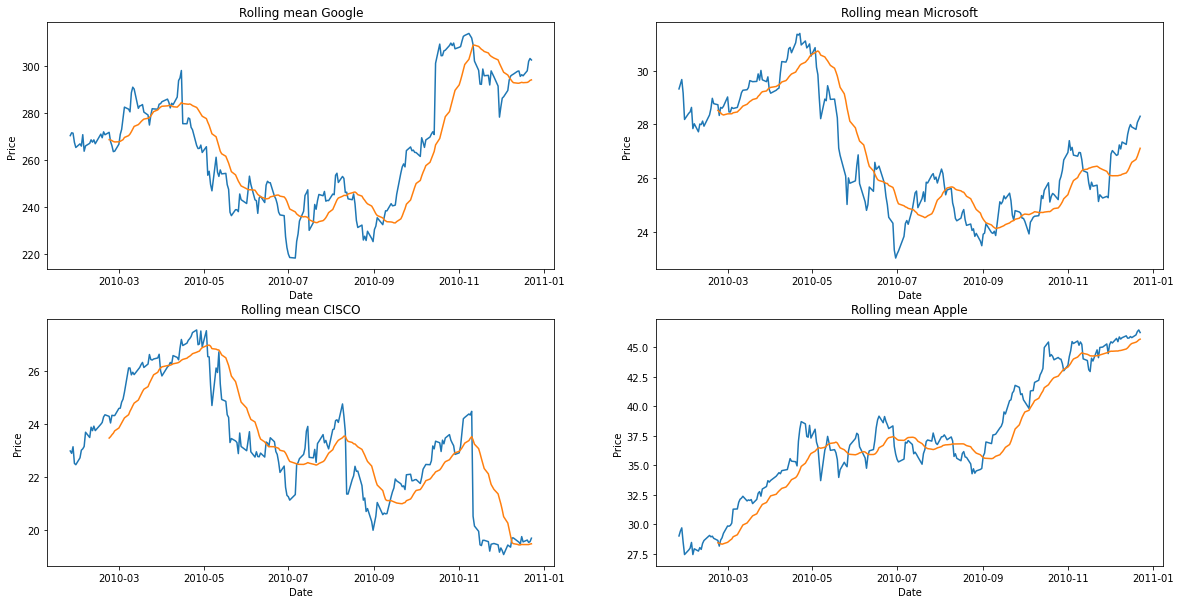

In [0]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(a['GOOGL'].index,a['GOOGL'].values)
ax[0,0].plot(rollingMean(a['GOOGL']).index,rollingMean(a['GOOGL']).values)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Price")
ax[0,0].set_title(f"Rolling mean Google")

ax[0,1].plot(a['MSFT'].index,a['MSFT'].values)
ax[0,1].plot(rollingMean(a['MSFT']).index,rollingMean(a['MSFT']).values)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Price")
ax[0,1].set_title(f"Rolling mean Microsoft")

ax[1,0].plot(a['CSCO'].index,a['CSCO'].values)
ax[1,0].plot(rollingMean(a['CSCO']).index,rollingMean(a['CSCO']).values)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Price")
ax[1,0].set_title(f"Rolling mean CISCO")

ax[1,1].plot(a['AAPL'].index,a['AAPL'].values)
ax[1,1].plot(rollingMean(a['AAPL']).index,rollingMean(a['AAPL']).values)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Price")
ax[1,1].set_title(f"Rolling mean Apple")

## Calculate rolling standard deviation [~Risk] 

In [0]:
def rollingStd(df):
    
    return df.rolling(20).std()

In [0]:
rollingStd(a).head(22)

,GOOGL,CSCO,MSFT,AAPL
2010-01-25,NaN,NaN,NaN,NaN
2010-01-26,NaN,NaN,NaN,NaN
2010-01-27,NaN,NaN,NaN,NaN
2010-01-28,NaN,NaN,NaN,NaN
2010-01-29,NaN,NaN,NaN,NaN
2010-02-01,NaN,NaN,NaN,NaN
2010-02-02,NaN,NaN,NaN,NaN
2010-02-03,NaN,NaN,NaN,NaN
2010-02-04,NaN,NaN,NaN,NaN
2010-02-05,NaN,NaN,NaN,NaN


## Risk in percentage

Text(0.5, 1.0, 'Risk Apple')

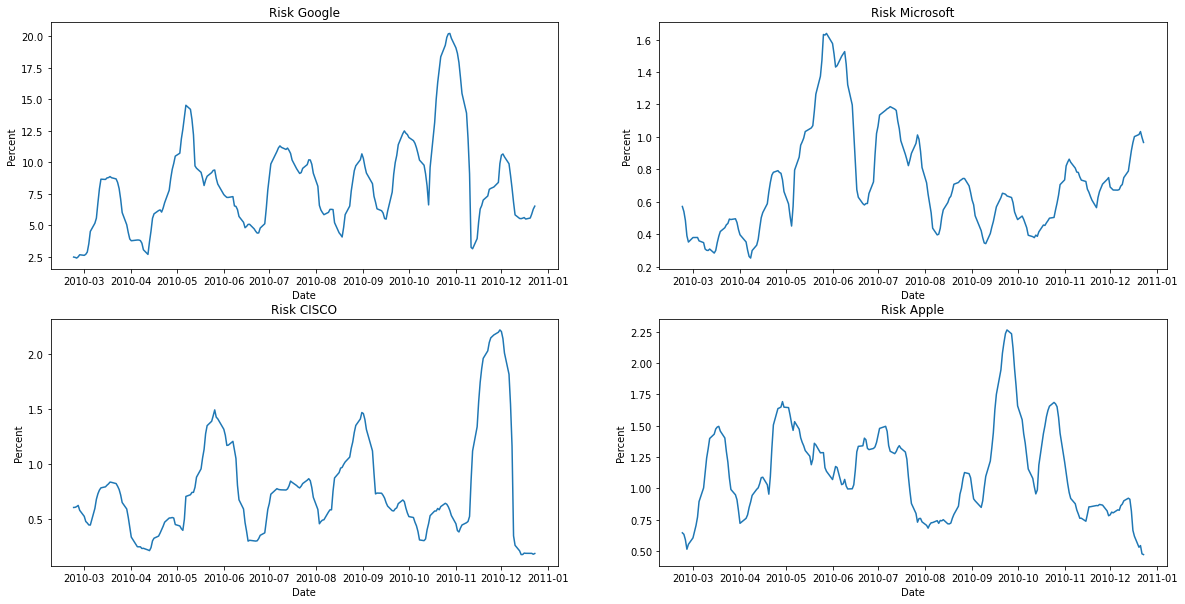

In [0]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(rollingStd(a['GOOGL']).index,rollingStd(a['GOOGL']).values)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Percent")
ax[0,0].set_title(f"Risk Google")

ax[0,1].plot(rollingStd(a['MSFT']).index,rollingStd(a['MSFT']).values)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Percent")
ax[0,1].set_title(f"Risk Microsoft")

ax[1,0].plot(rollingStd(a['CSCO']).index,rollingStd(a['CSCO']).values)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Percent")
ax[1,0].set_title(f"Risk CISCO")

ax[1,1].plot(rollingStd(a['AAPL']).index,rollingStd(a['AAPL']).values)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Percent")
ax[1,1].set_title(f"Risk Apple")

## Daily Return (%)

In [0]:
def dailyReturn(df):
    df=((df/df.shift(1))-1)*100
   
    return df

In [0]:
dailyReturn(a).head()

,GOOGL,CSCO,MSFT,AAPL
2010-01-25,NaN,NaN,NaN,NaN
2010-01-26,0.448149,-0.391475,0.613916,1.413305
2010-01-27,-0.058993,1.091703,0.576271,0.942024
2010-01-28,-1.440692,-2.721379,-1.718909,-4.132196
2010-01-29,-0.814168,-0.222030,-3.360767,-3.627875


Text(0.5, 1.0, 'Daily Return Apple')

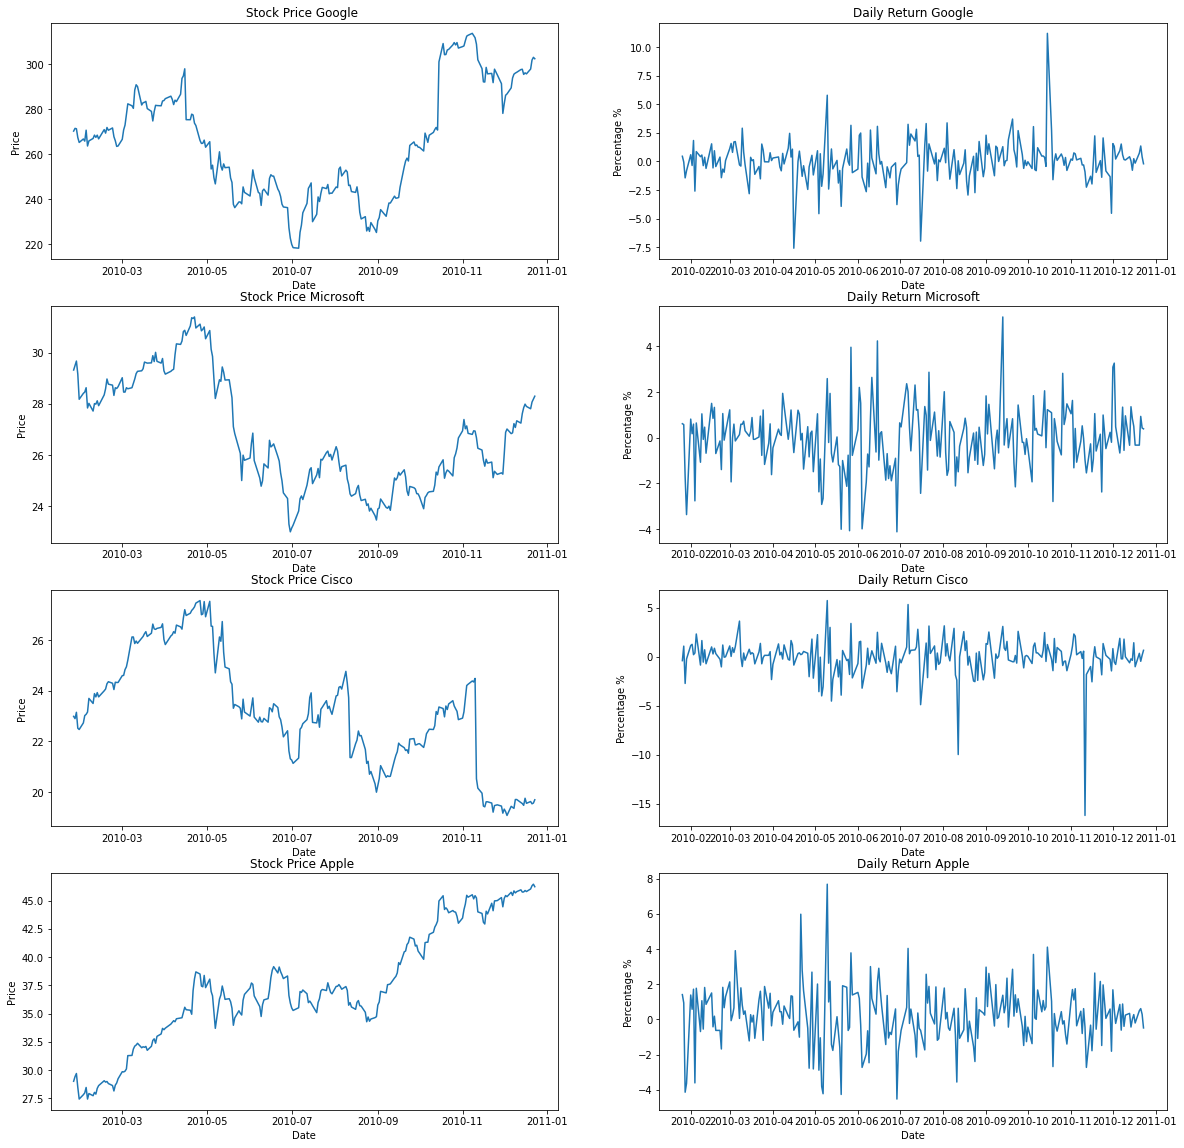

In [0]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
ax[0,0].plot(a['GOOGL'].index,a['GOOGL'].values)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Price")
ax[0,0].set_title(f"Stock Price Google ")
ax[0,1].plot(dailyReturn(a['GOOGL']).index,dailyReturn(a['GOOGL']).values)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Percentage %")
ax[0,1].set_title(f"Daily Return Google")

ax[1,0].plot(a['MSFT'].index,a['MSFT'].values)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Price")
ax[1,0].set_title(f"Stock Price Microsoft ")
ax[1,1].plot(dailyReturn(a['MSFT']).index,dailyReturn(a['MSFT']).values)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Percentage %")
ax[1,1].set_title(f"Daily Return Microsoft")

ax[2,0].plot(a['CSCO'].index,a['CSCO'].values)
ax[2,0].set_xlabel("Date")
ax[2,0].set_ylabel("Price")
ax[2,0].set_title(f"Stock Price Cisco ")
ax[2,1].plot(dailyReturn(a['CSCO']).index,dailyReturn(a['CSCO']).values)
ax[2,1].set_xlabel("Date")
ax[2,1].set_ylabel("Percentage %")
ax[2,1].set_title(f"Daily Return Cisco")

ax[3,0].plot(a['AAPL'].index,a['AAPL'].values)
ax[3,0].set_xlabel("Date")
ax[3,0].set_ylabel("Price")
ax[3,0].set_title(f"Stock Price Apple ")
ax[3,1].plot(dailyReturn(a['AAPL']).index,dailyReturn(a['AAPL']).values)
ax[3,1].set_xlabel("Date")
ax[3,1].set_ylabel("Percentage %")
ax[3,1].set_title(f"Daily Return Apple")


## Cumulative Return in % 

In [0]:
def cumulativeReturn(df):
    df=((df/df.iloc[0])-1)*100
    
    return df

Text(0.5, 1.0, 'Cumulative Return Apple')

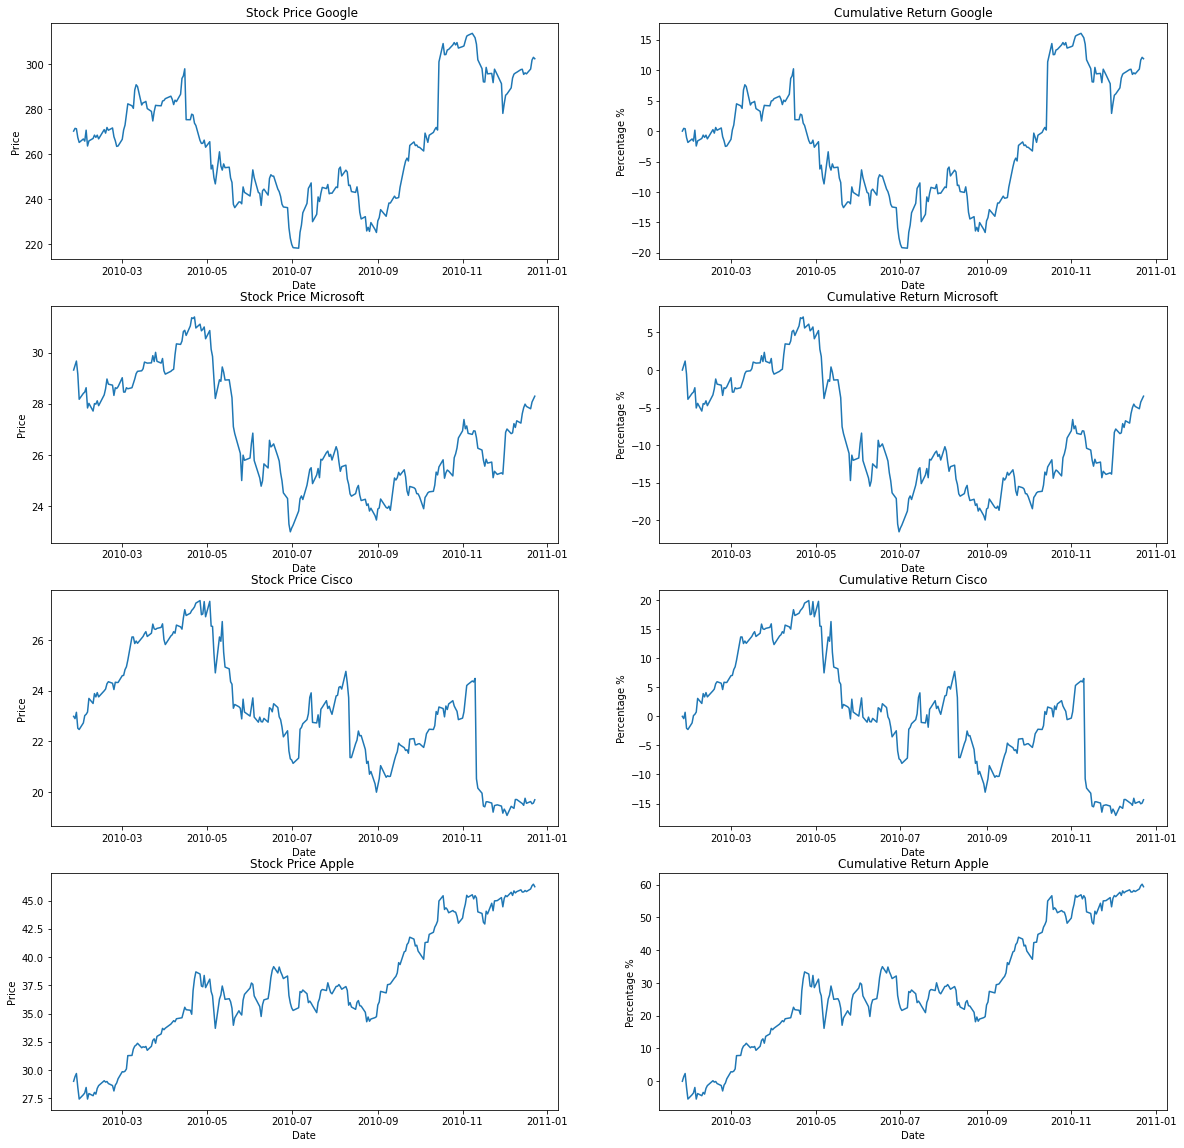

In [0]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
ax[0,0].plot(a['GOOGL'].index,a['GOOGL'].values)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Price")
ax[0,0].set_title(f"Stock Price Google ")
ax[0,1].plot(cumulativeReturn(a['GOOGL']).index,cumulativeReturn(a['GOOGL']).values)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Percentage %")
ax[0,1].set_title(f"Cumulative Return Google")

ax[1,0].plot(a['MSFT'].index,a['MSFT'].values)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Price")
ax[1,0].set_title(f"Stock Price Microsoft ")
ax[1,1].plot(cumulativeReturn(a['MSFT']).index,cumulativeReturn(a['MSFT']).values)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Percentage %")
ax[1,1].set_title(f"Cumulative Return Microsoft")

ax[2,0].plot(a['CSCO'].index,a['CSCO'].values)
ax[2,0].set_xlabel("Date")
ax[2,0].set_ylabel("Price")
ax[2,0].set_title(f"Stock Price Cisco ")
ax[2,1].plot(cumulativeReturn(a['CSCO']).index,cumulativeReturn(a['CSCO']).values)
ax[2,1].set_xlabel("Date")
ax[2,1].set_ylabel("Percentage %")
ax[2,1].set_title(f"Cumulative Return Cisco")

ax[3,0].plot(a['AAPL'].index,a['AAPL'].values)
ax[3,0].set_xlabel("Date")
ax[3,0].set_ylabel("Price")
ax[3,0].set_title(f"Stock Price Apple ")
ax[3,1].plot(cumulativeReturn(a['AAPL']).index,cumulativeReturn(a['AAPL']).values)
ax[3,1].set_xlabel("Date")
ax[3,1].set_ylabel("Percentage %")
ax[3,1].set_title(f"Cumulative Return Apple")


## Bollinger Bands 


In [0]:
#Calculating bollinger bands
def bolingerBand(df):
    
    x = df
   #Calculate upper band
    upper_rolling=rollingMean(x)+(rollingStd(x)*2)
    
    #Calculate lower band
    lower_rolling=rollingMean(x)-(rollingStd(x)*2)
    
    
    return upper_rolling,lower_rolling

In [0]:
u1,l1=bolingerBand(a['GOOGL'])
u2,l2=bolingerBand(a['MSFT'])
u3,l3=bolingerBand(a['CSCO'])
u4,l4=bolingerBand(a['AAPL'])




Text(0.5, 1.0, 'Bollinger Bands Apple')

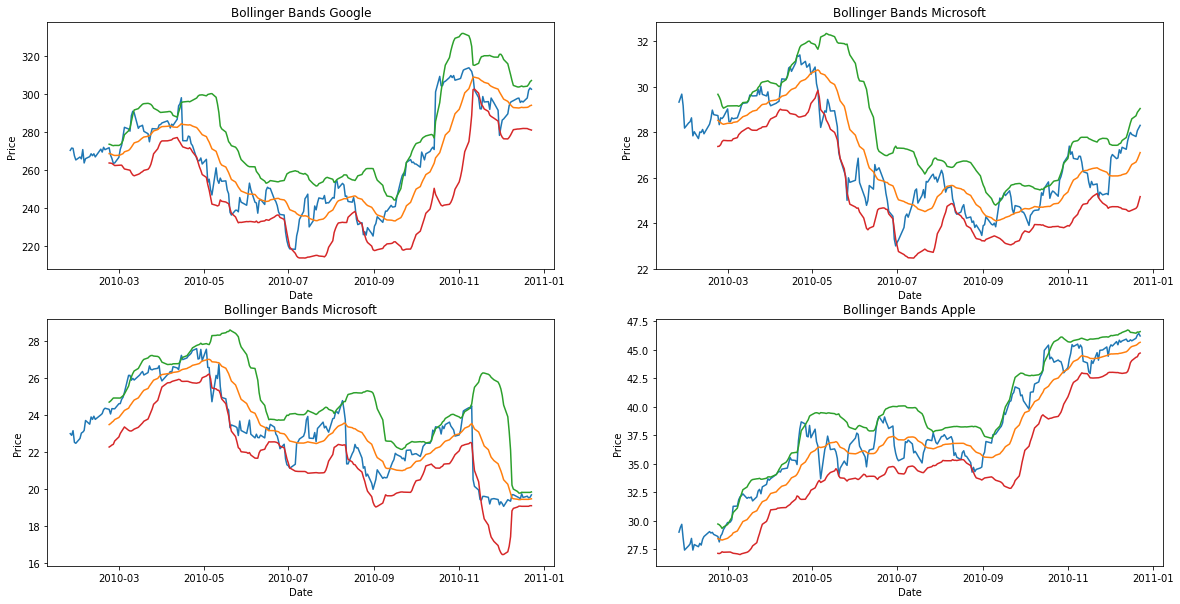

In [0]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(a['GOOGL'].index,a['GOOGL'].values)
ax[0,0].plot(rollingMean(a['GOOGL']).index,rollingMean(a['GOOGL']).values)
ax[0,0].plot(u1.index,u1.values)
ax[0,0].plot(l1.index,l1.values) 
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Price")
ax[0,0].set_title(f"Bollinger Bands Google")

ax[0,1].plot(a['MSFT'].index,a['MSFT'].values)
ax[0,1].plot(rollingMean(a['MSFT']).index,rollingMean(a['MSFT']).values)
ax[0,1].plot(u2.index,u2.values)
ax[0,1].plot(l2.index,l2.values) 
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Price")
ax[0,1].set_title(f"Bollinger Bands Microsoft")


ax[1,0].plot(a['CSCO'].index,a['CSCO'].values)
ax[1,0].plot(rollingMean(a['CSCO']).index,rollingMean(a['CSCO']).values)
ax[1,0].plot(u3.index,u3.values)
ax[1,0].plot(l3.index,l3.values) 
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("Price")
ax[1,0].set_title(f"Bollinger Bands Microsoft")

ax[1,1].plot(a['AAPL'].index,a['AAPL'].values)
ax[1,1].plot(rollingMean(a['AAPL']).index,rollingMean(a['AAPL']).values)
ax[1,1].plot(u4.index,u4.values)
ax[1,1].plot(l4.index,l4.values) 
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Price")
ax[1,1].set_title(f"Bollinger Bands Apple")

## Alfa Beta Values


In [0]:

def alfaBeta(df,l,market):
    #df is whole stock data, l is list of company to find alfa beta value wrt to market
    for com in l:
        
        #calulate daily return
        x = dailyReturn(df[market]).dropna()
        y = dailyReturn(df[com]).dropna()
        
        #Calculate beta alfa values
        beta,alfa=np.polyfit(x,y,1)
        
        #Plot the values and line
        ax=dailyReturn(df).plot(kind='scatter',x=market,y=com)
        plt.plot(x,beta*x+alfa,color='r')
        ax.set_xlabel(f"Daily Return Value {com} vs {market}")
        print(f"Alfa Value for {com} is {alfa}  wrt to {market}")
        print(f"Beta Value for {com} is {alfa}  wrt to {market}")
        
    print("Correlation between each value and market is \n")
    print(df.corr(method='pearson'))

Alfa Value for CSCO is -0.07705846092161617  wrt to GOOGL
Beta Value for CSCO is -0.07705846092161617  wrt to GOOGL
Alfa Value for MSFT is -0.03149489412118781  wrt to GOOGL
Beta Value for MSFT is -0.03149489412118781  wrt to GOOGL
Alfa Value for AAPL is 0.17963671157124203  wrt to GOOGL
Beta Value for AAPL is 0.17963671157124203  wrt to GOOGL
Correlation between each value and market is 

          GOOGL      CSCO      MSFT      AAPL
GOOGL  1.000000  0.074985  0.451982  0.413965
CSCO   0.074985  1.000000  0.707491 -0.505308
MSFT   0.451982  0.707491  1.000000 -0.345336
AAPL   0.413965 -0.505308 -0.345336  1.000000


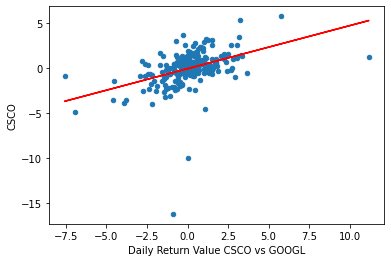

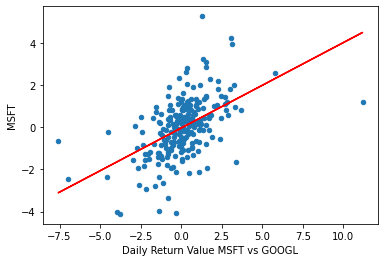

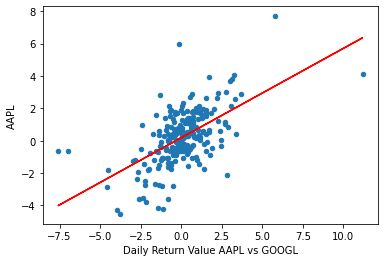

In [0]:
alfaBeta(a,ticker[1:],'GOOGL')

## Porfolio metric

In [0]:
def portfolio_val_calc(prices,l,investment):
    investment=[investment]*4
    prices=prices/prices.iloc[0]
    prices=prices*alloc
    prices=prices*investment
    prices['PortVal']=prices.sum(axis=1)
    
    return prices

## Company intrested Google,Microsoft,Cisco,Apple

##Total investment=100000

In [0]:
investment = 100000
company=['GOOGL','MSFT','CSCO','AAPL']
data=stock_data(start,end,company)

In [0]:
data = portfolio_val_calc(data,company,investment)

Text(0.5, 0, 'Date')

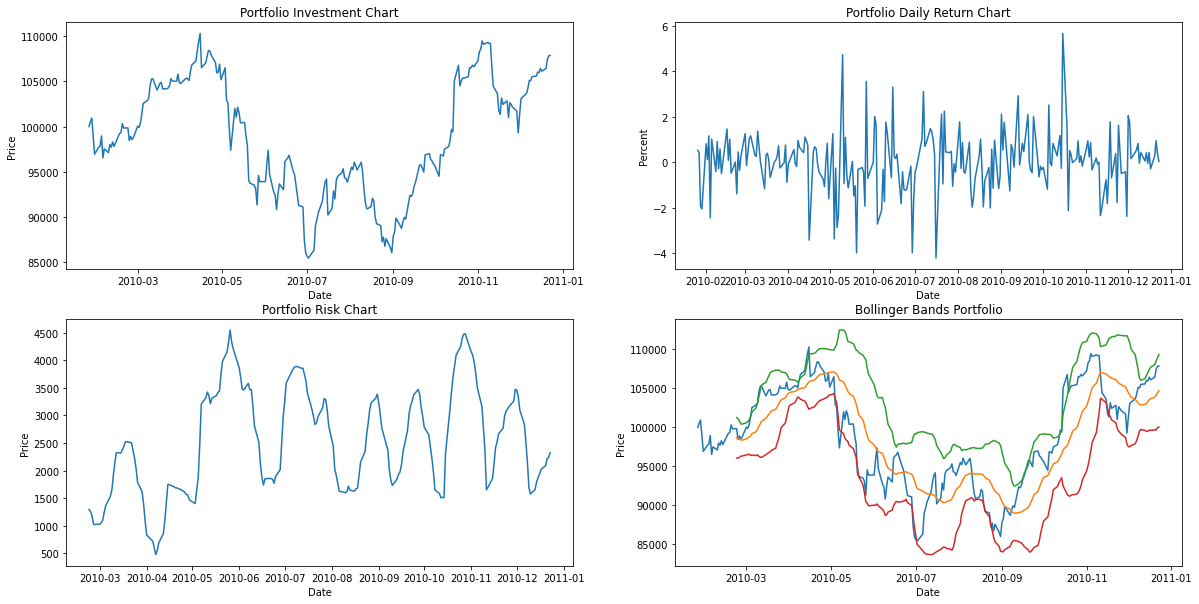

In [0]:
u,l=bolingerBand(data['PortVal'])
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(data['PortVal'].index,data['PortVal'].values)
ax[0,0].set_title('Portfolio Investment Chart')
ax[0,0].set_ylabel("Price")
ax[0,0].set_xlabel("Date")

ax[1,0].plot(rollingStd(data['PortVal']).index,rollingStd(data['PortVal']).values)
ax[1,0].set_title('Portfolio Risk Chart')
ax[1,0].set_ylabel("Price")
ax[1,0].set_xlabel("Date")

ax[1,1].plot(data['PortVal'].index,data['PortVal'].values)
ax[1,1].plot(rollingMean(data['PortVal']).index,rollingMean(data['PortVal']).values)
ax[1,1].plot(u.index,u.values)
ax[1,1].plot(l.index,l.values) 
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("Price")
ax[1,1].set_title(f"Bollinger Bands Portfolio")

ax[0,1].plot(dailyReturn(data['PortVal']).index,dailyReturn(data['PortVal']).values)
ax[0,1].set_title('Portfolio Daily Return Chart')
ax[0,1].set_ylabel("Percent")
ax[0,1].set_xlabel("Date")

#Portfolio Optimization

In [0]:
import scipy.optimize as spo


In [0]:
def err(l,d):
  er = np.sum((d[:,1]))
